# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [3]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

**Zadanie Domowe **   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) 


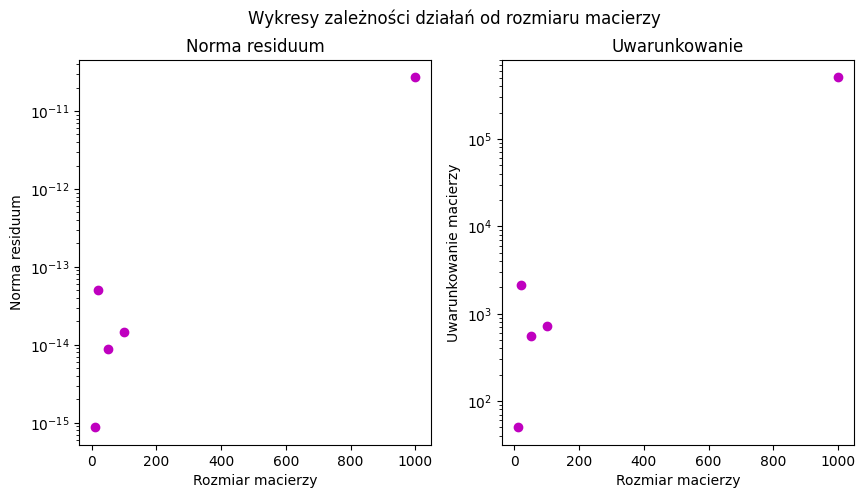

In [4]:
import numpy as np
import matplotlib as plt

def random_matrix_Ab(m: int):
    try:
        a1 = np.random.rand(m, m)
        a2 = np.random.rand(m)
    except(ValueError, TypeError):
        return None
    return a1, a2


def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray):
    try:
        rn = np.linalg.norm(b - A @ x)
        return rn
    except ValueError:
        return None
m = [10, 20, 50, 100, 1000]
rm_result = []

for i in m:
    rm_result.append(random_matrix_Ab(i))

import numpy as np
import main

solve_results = []
norm_res = []
cond_results = []

for i in range(len(rm_result)):
    A = rm_result[i][0]
    b = rm_result[i][1]
    
    solve_result = np.linalg.solve(A, b)
    solve_results.append(solve_result)
    
    residual_norm = main.residual_norm(A, solve_result, b)
    norm_res.append(residual_norm)
    
    cond_result = np.linalg.cond(A)
    cond_results.append(cond_result)

cond_results = []
for i in range(len(rm_result)):
    cond_results.append(np.linalg.cond(rm_result[i][0]))
import matplotlib.pyplot as plt

fig1, (s_norm, s_cond) = plt.subplots(1, 2, figsize=(10, 5))
fig1.suptitle('Wykresy zależności działań od rozmiaru macierzy')

# Wykres normy residuum
s_norm.plot(m, norm_res, 'mo')
s_norm.set_yscale('log')
s_norm.set_xlabel('Rozmiar macierzy')
s_norm.set_ylabel('Norma residuum')
s_norm.set_title('Norma residuum')

# Wykres uwarunkowania
s_cond.plot(m, cond_results, 'mo')
s_cond.set_yscale('log')
s_cond.set_xlabel('Rozmiar macierzy')
s_cond.set_ylabel('Uwarunkowanie macierzy')
s_cond.set_title('Uwarunkowanie')

plt.show()


In [5]:
import timeit
create_time_avg = np.zeros(len(m))
create_time_std_dev = np.zeros(len(m))

print('Pomiar czasu tworzenia macierzy:')

for i in range(len(m)):
    print('Rozmiar macierzy: ', m[i])
    print('Timing: ')
    saved_timing = timeit.timeit(lambda: main.random_matrix_Ab(m[i]), number=10)
    create_time_avg[i] = saved_timing / 10  # Oblicz średni czas na podstawie całkowitego czasu
    print('Średni czas:', create_time_avg[i])
    
    # Oblicz odchylenie standardowe (std dev) na podstawie pomiarów
    timeit_results = timeit.repeat(lambda: main.random_matrix_Ab(m[i]), repeat=5, number=10)
    create_time_std_dev[i] = np.std(timeit_results)
    print('Odchylenie standardowe:', create_time_std_dev[i])
    print('---------------------------------------------', '\n')

Pomiar czasu tworzenia macierzy:
Rozmiar macierzy:  10
Timing: 
Średni czas: 1.6209998284466566e-05
Odchylenie standardowe: 1.3308858398043937e-05
--------------------------------------------- 

Rozmiar macierzy:  20
Timing: 
Średni czas: 7.929999264888466e-06
Odchylenie standardowe: 2.1734217359547078e-05
--------------------------------------------- 

Rozmiar macierzy:  50
Timing: 
Średni czas: 2.4150000535883008e-05
Odchylenie standardowe: 1.0781159747220911e-05
--------------------------------------------- 

Rozmiar macierzy:  100
Timing: 
Średni czas: 9.213999728672207e-05
Odchylenie standardowe: 0.00010420437550692791
--------------------------------------------- 

Rozmiar macierzy:  1000
Timing: 
Średni czas: 0.010638879999169149
Odchylenie standardowe: 0.004492449845805444
--------------------------------------------- 



In [6]:
import numpy as np

solve_time_avg = np.zeros(len(m))
solve_time_std_dev = np.zeros(len(m))

print('Pomiar czasu rozwiązywania równania macierzowego:')

for i in range(len(m)):
    print('Rozmiar macierzy: ', m[i])
    print('Timing: ')
    def solve_and_time():
        return np.linalg.solve(rm_result[i][0], rm_result[i][1])

    saved_timing = %timeit -r 5 -n 10 -o solve_and_time()
    solve_time_avg[i] = saved_timing.average
    solve_time_std_dev[i] = saved_timing.stdev
    print('Średni czas:', solve_time_avg[i])
    print('Odchylenie standardowe:', solve_time_std_dev[i])
    print('---------------------------------------------', '\n')


Pomiar czasu rozwiązywania równania macierzowego:
Rozmiar macierzy:  10
Timing: 
9.22 µs ± 3.87 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Średni czas: 9.215999161824583e-06
Odchylenie standardowe: 3.874587140803946e-06
--------------------------------------------- 

Rozmiar macierzy:  20
Timing: 
182 µs ± 79.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Średni czas: 0.00018174599914345892
Odchylenie standardowe: 7.969840632724759e-05
--------------------------------------------- 

Rozmiar macierzy:  50
Timing: 
913 µs ± 177 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Średni czas: 0.0009128280001459644
Odchylenie standardowe: 0.00017695786885638917
--------------------------------------------- 

Rozmiar macierzy:  100
Timing: 
The slowest run took 9.80 times longer than the fastest. This could mean that an intermediate result is being cached.
4.05 ms ± 3.81 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Średni czas: 0.004046006000135094
Odc

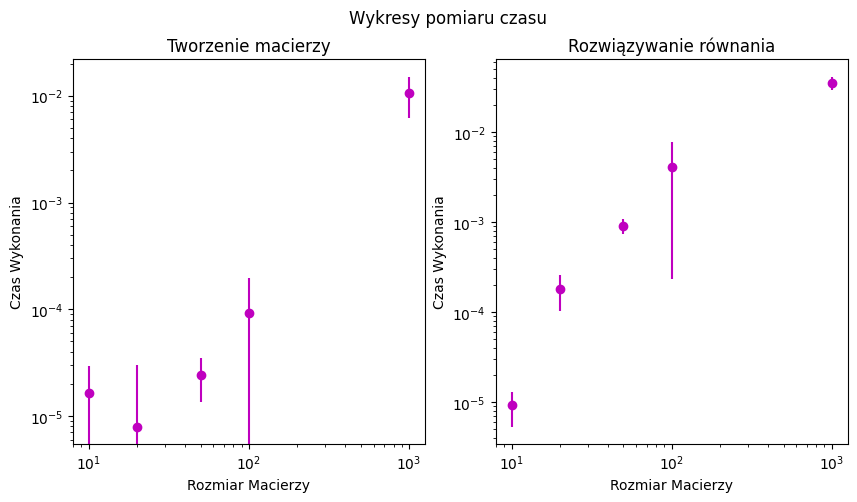

In [7]:
import matplotlib.pyplot as plt

fig0, (t_create, t_solve) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Wykresy pomiaru czasu')

# Wykres tworzenia macierzy
t_create.errorbar(m, create_time_avg, yerr=create_time_std_dev, fmt='mo')
t_create.set_xscale('log')
t_create.set_yscale('log')
t_create.set_xlabel('Rozmiar Macierzy')
t_create.set_ylabel('Czas Wykonania')
t_create.set_title('Tworzenie macierzy')

# Wykres rozwiązywania równania
t_solve.errorbar(m, solve_time_avg, yerr=solve_time_std_dev, fmt='mo')
t_solve.set_xscale('log')
t_solve.set_yscale('log')
t_solve.set_xlabel('Rozmiar Macierzy')
t_solve.set_ylabel('Czas Wykonania')
t_solve.set_title('Rozwiązywanie równania')

plt.show()


***Zadanie 1***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*
  

In [27]:
#4
Zakres wartości oraz wymiary macierzy mają znaczący wpływ na jakość otrzymanych wyników. Wraz z ich wzrostem, dokładnośc maleje

SyntaxError: invalid syntax (3353368549.py, line 2)

***Zadanie 2***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [8]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [33]:
S1 = np.logspace(100, 1, num=3)

- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [34]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0]+100

- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 

In [35]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0]-100



W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:
 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as nplin

A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
U, S, V = nplin.svd(A)

S1 = np.diag(S[:1])
S2 = np.diag(S[:2])
S3 = np.diag(S[:3])

A1 = np.dot(U[:, :1], np.dot(S1, V[:1, :]))
A2 = np.dot(U[:, :2], np.dot(S2, V[:2, :]))
A3 = np.dot(U[:, :3], np.dot(S3, V[:3, :]))

print('Oryginalna Macierz:')
print(A)

print('Zrekonstruowana Macierz dla S1:')
print(A1)

print('Zrekonstruowana Macierz dla S2:')
print(A2)

print('Zrekonstruowana Macierz dla S3:')
print(A3)


Oryginalna Macierz:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Zrekonstruowana Macierz dla S1:
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
Zrekonstruowana Macierz dla S2:
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
Zrekonstruowana Macierz dla S3:
[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


NameError: name 'norm_log_v_rec' is not defined

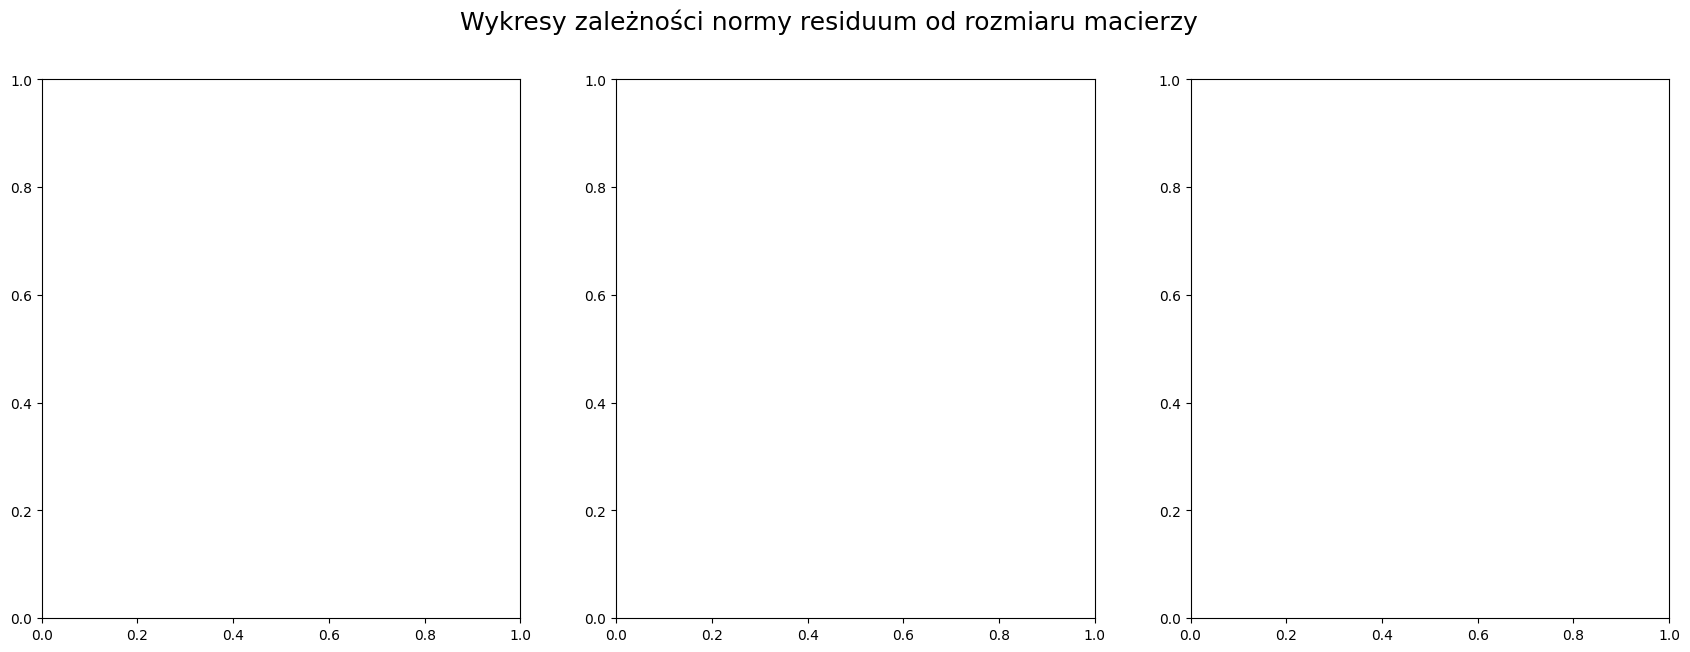



3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 




Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)